In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
co2 = pd.read_csv('/Users/danielbrechner/hurrdat_co2/assets/co2.csv');
co2.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km�
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km�
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km�
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km�
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km�


In [4]:
co2.dtypes

Country                 object
Code                    object
Calling Code            object
Year                     int64
CO2 emission (Tons)    float64
Population(2022)       float64
Area                   float64
% of World              object
Density(km2)            object
dtype: object

Only using the same years availible in the Hurricane dataset (1950-2015)

In [5]:
co2_df = co2.query('Year >= 1950 & Year < 2016')
co2_df

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
200,Afghanistan,AF,93,1950,98928.0,41128771.0,652230.0,0.40%,63/km�
201,Afghanistan,AF,93,1951,190528.0,41128771.0,652230.0,0.40%,63/km�
202,Afghanistan,AF,93,1952,282128.0,41128771.0,652230.0,0.40%,63/km�
203,Afghanistan,AF,93,1953,388384.0,41128771.0,652230.0,0.40%,63/km�
204,Afghanistan,AF,93,1954,494640.0,41128771.0,652230.0,0.40%,63/km�
...,...,...,...,...,...,...,...,...,...
59610,Zimbabwe,ZW,263,2011,681878824.0,16320537.0,390757.0,0.30%,42/km�
59611,Zimbabwe,ZW,263,2012,689761713.0,16320537.0,390757.0,0.30%,42/km�
59612,Zimbabwe,ZW,263,2013,701597967.0,16320537.0,390757.0,0.30%,42/km�
59613,Zimbabwe,ZW,263,2014,713503654.0,16320537.0,390757.0,0.30%,42/km�


In [6]:
co2_small = co2_df.drop(columns=['Code', 'Calling Code','Area','% of World','Density(km2)'])
co2_small

,Country,Year,CO2 emission (Tons),Population(2022)
200,Afghanistan,1950,98928.0,41128771.0
201,Afghanistan,1951,190528.0,41128771.0
202,Afghanistan,1952,282128.0,41128771.0
203,Afghanistan,1953,388384.0,41128771.0
204,Afghanistan,1954,494640.0,41128771.0
...,...,...,...,...
59610,Zimbabwe,2011,681878824.0,16320537.0
59611,Zimbabwe,2012,689761713.0,16320537.0
59612,Zimbabwe,2013,701597967.0,16320537.0
59613,Zimbabwe,2014,713503654.0,16320537.0


Grouping global CO2 sum by year and creating new DataFrame. 

In [7]:
grouped_df = co2_small.groupby('Year')['CO2 emission (Tons)'].sum().reset_index() #reset_index()  method will reset the index and turn it back into a regular column, so that it can be included in the resulting dataframe.
grouped_df.head()

,Year,CO2 emission (Tons)
0,1950,2.301847e+11
1,1951,2.364093e+11
2,1952,2.427168e+11
3,1953,2.492005e+11
4,1954,2.555678e+11


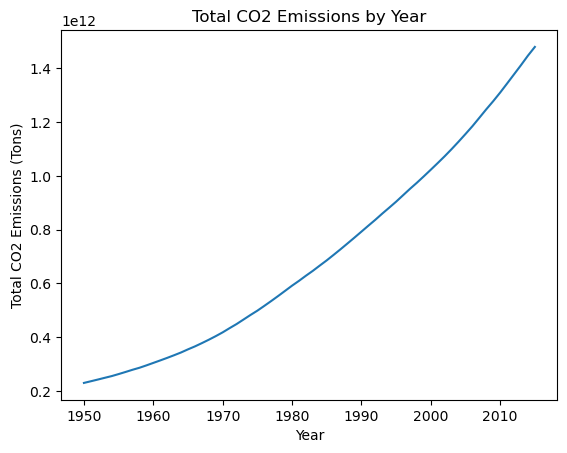

In [8]:
plt.plot(grouped_df['Year'], grouped_df['CO2 emission (Tons)'])
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Tons)')
plt.title('Total CO2 Emissions by Year')
plt.show()

In [9]:
grouped_df.to_csv('co_2.csv', index=False)